In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('C:/Users/Janhavi/Downloads/archive (2)/train.csv')

In [3]:
data_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
data_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
mean_product_category_2 = data_train['Product_Category_2'].mean()
mean_product_category_3 = data_train['Product_Category_3'].mean()

In [8]:
data_train.fillna(mean_product_category_2,inplace = True)
data_train.fillna(mean_product_category_3,inplace = True)

In [9]:
data_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<Axes: title={'center': 'Purchase Distribution'}, ylabel='Frequency'>

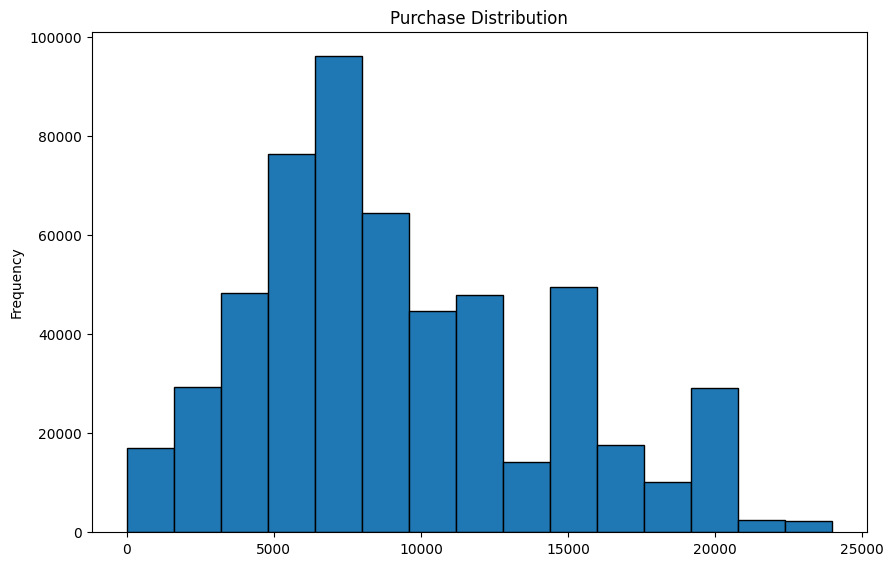

In [10]:
purchase_d=data_train['Purchase']
purchase_d.plot(kind='hist',bins=15, 
       edgecolor = 'black',figsize=(10,6.5),title='Purchase Distribution')

<Axes: title={'center': 'Occupation count'}, xlabel='Occupation'>

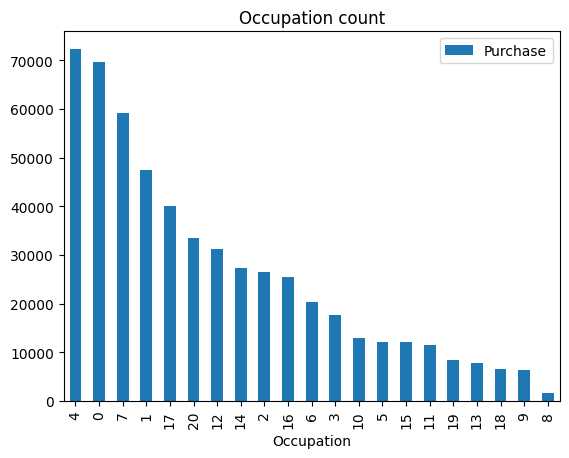

In [11]:
ocu_count=data_train[['Occupation','Purchase']].groupby('Occupation').count()
ocu_count=ocu_count.sort_values(by='Purchase',ascending=False)
ocu_count.plot(kind='bar',title='Occupation count')

array([<Axes: >], dtype=object)

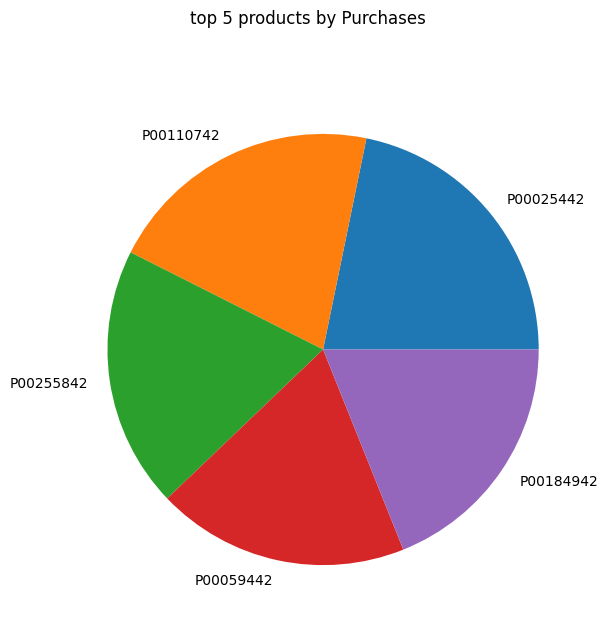

In [12]:
top_prod=data_train[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='top 5 products by Purchases',subplots=True,legend=False,ylabel='',figsize=(12,7))

In [13]:
# Assuming 'column_name' is the name of the non-numeric column to be removed
data_train = data_train.drop(columns=['Product_ID'])


In [14]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [17]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
data_train['Gender'] = data_train['Gender'].apply(map_gender)

In [19]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data_train['Age'] = data_train['Age'].apply(map_age)

In [20]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
data_train['Stay_In_Current_City_Years'] = data_train['Stay_In_Current_City_Years'].apply(map_stay)  

In [22]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
data_train['City_Category'] = data_train['City_Category'].apply(map_city_categories)

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


<Axes: >

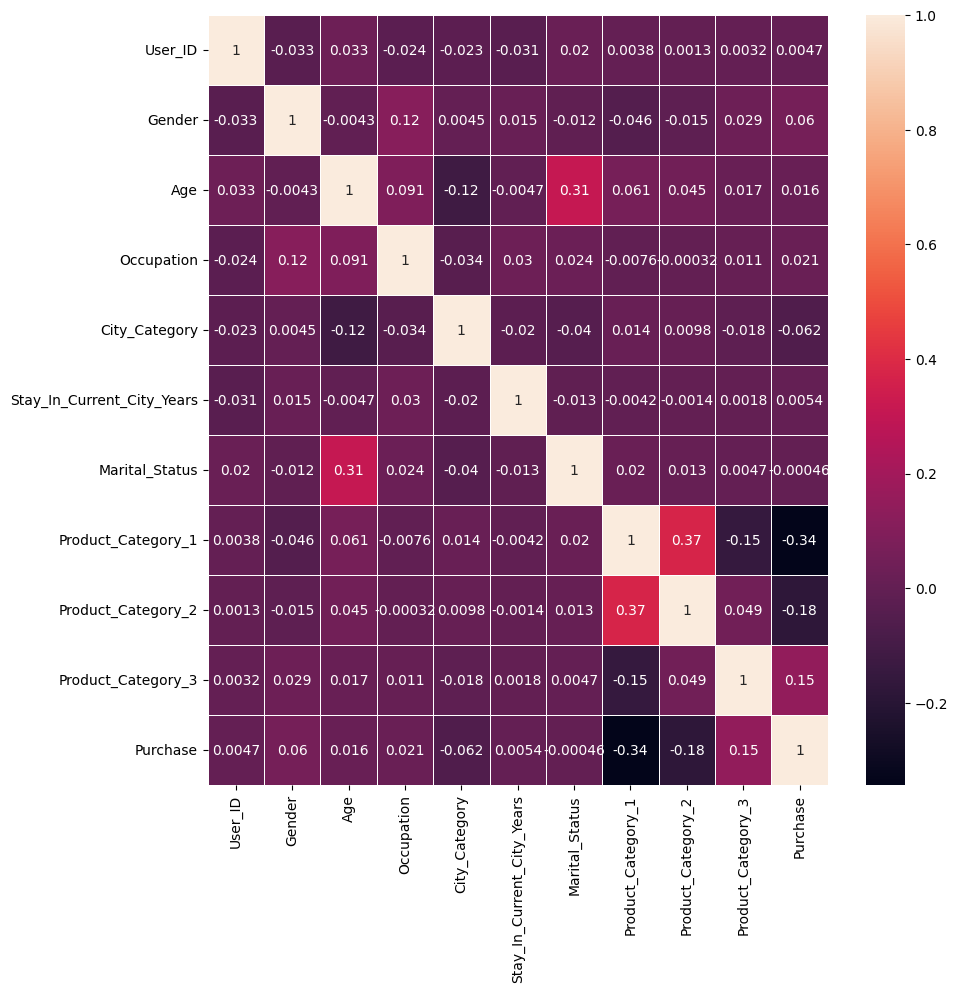

In [26]:
corr = data_train.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,
    xticklabels=corr.columns, 
    yticklabels=corr.columns,  
    annot=True, linewidths=0.5, 
    ax=ax)

In [27]:
corr

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,-0.022859,-0.030737,0.020443,0.003825,0.001267,0.003195,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,0.004515,0.014660,-0.011603,-0.045594,-0.015300,0.029361,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,-0.123079,-0.004712,0.311738,0.061197,0.045185,0.017054,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,-0.034479,0.030005,0.024280,-0.007618,-0.000317,0.011437,0.020833
City_Category,-0.022859,0.004515,-0.123079,-0.034479,1.000000,-0.019946,-0.039790,0.014364,0.009777,-0.018057,-0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,-0.019946,1.000000,-0.012819,-0.004213,-0.001368,0.001828,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,-0.039790,-0.012819,1.000000,0.019888,0.012507,0.004747,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,0.014364,-0.004213,0.019888,1.000000,0.373686,-0.149631,-0.343703
Product_Category_2,0.001267,-0.015300,0.045185,-0.000317,0.009777,-0.001368,0.012507,0.373686,1.000000,0.048727,-0.179309
Product_Category_3,0.003195,0.029361,0.017054,0.011437,-0.018057,0.001828,0.004747,-0.149631,0.048727,1.000000,0.145446


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
X= data_train.drop('Purchase', axis = 1)
y=data_train['Purchase']

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 21689613.104400385
R-squared (R2): 0.13677235648454455


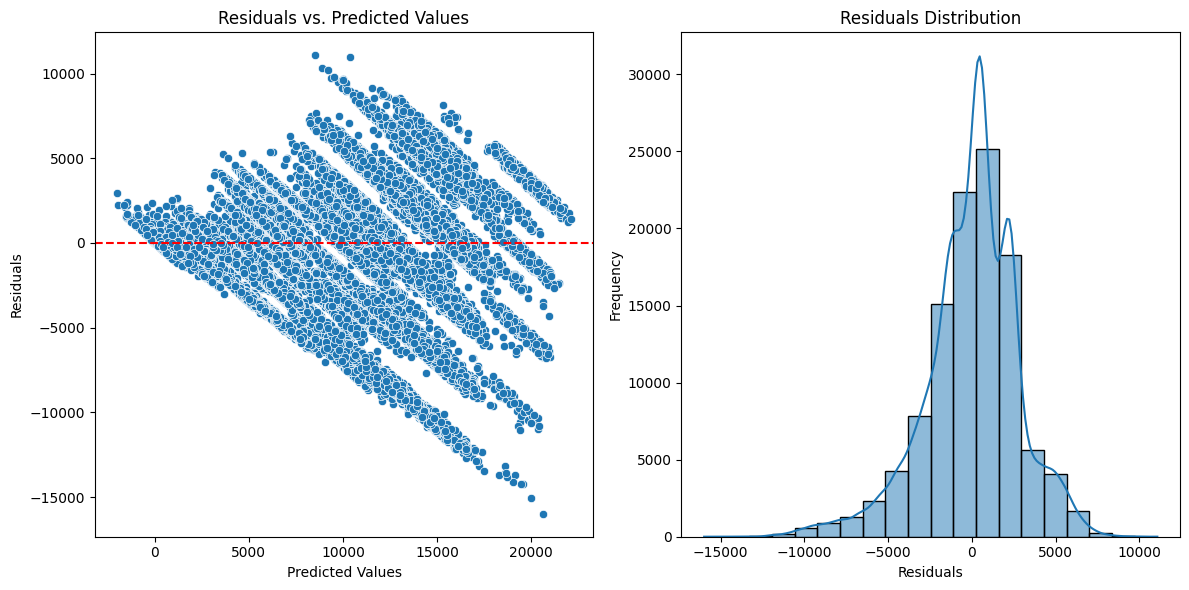

In [38]:

residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')


plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()






In [34]:
pip install xgboost

     -------------------------------------- 70.9/70.9 MB 187.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import xgboost as xgb

In [36]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 7980087.083623432
R-squared (R2): 0.6823995091527559
